<a href="https://colab.research.google.com/github/sprnrdy13/How_to_Build_a_healthcare_startup/blob/master/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework Week 1
Assignment details
Watch FastAI lesson - https://course.fast.ai/videos/?lesson=1 Once you've watched the videos and have a good feeling for what was done do the following:

Start a new notebook
Import the FastAI libs and enter the notebook magics at the top
Using what you've learned train a ResNet34 on the full MNIST dataset (URLs.MNIST)
Grading
To successfully complete the assignment you will need to:

Demonstrate a minimum accuracy of 97% (if you're using accuracy in your metrics display, it should be above 0.97, if error_rate, it should be below 0.03)
Plot a confusion matrix with a figure size of (10,10) and a dpi of 60
Plot your top 6 losses
Post a link to your notebook in #lesson-1-hw-turn-in on Discord
Extra Credit:

Explain what the confusion matrix and the top losses are showing you in your own words.

Tips for this week
you will need to add "train='training', valid='testing'" to your from_folder call
DO NOT COPY AND PASTE from Jeremy's notebook to your own. Even if you're entering the EXACT SAME THING there is value in typing it yourself. It will stick with you MUCH MUCH better.

In [1]:
!curl https://course.fast.ai/setup/colab | bash


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   321  100   321    0     0     57      0  0:00:05  0:00:05 --:--:--    78
Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [5]:
path = untar_data(URLs.MNIST); path

PosixPath('/root/.fastai/data/mnist_png')

In [6]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_png/testing'),
 PosixPath('/root/.fastai/data/mnist_png/training')]

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, train='training', valid='testing', ds_tfms=tfms, size=26)

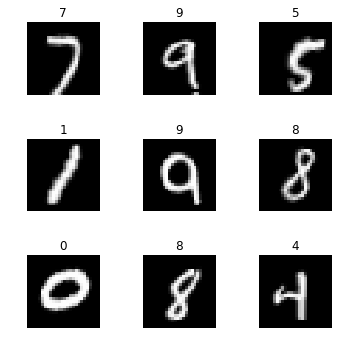

In [29]:
data.show_batch(rows=3, figsize=(5,5))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [31]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


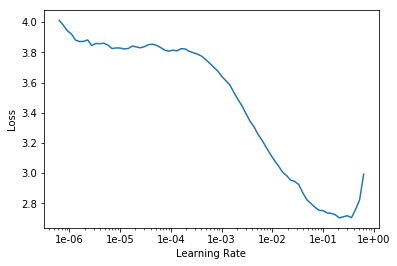

In [32]:
learn.recorder.plot()


In [33]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,0.775350,0.326385,0.029600,02:19
1,0.099806,61.912151,0.018700,02:17


In [34]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-3,1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,0.869686,0.198310,0.016800,02:10
1,0.066383,4.146621,0.009300,02:10


In [0]:
interp = ClassificationInterpretation.from_learner(learn)


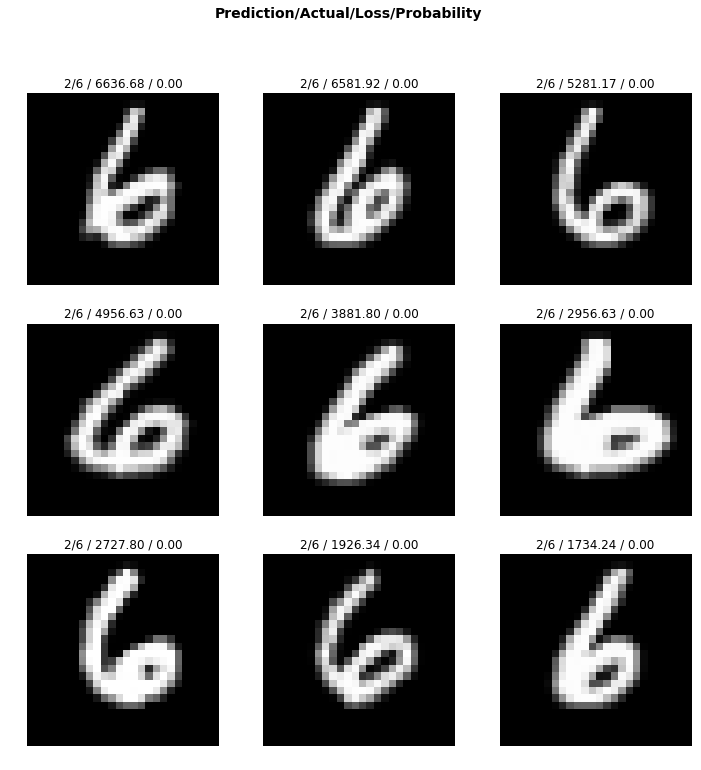

In [39]:
interp.plot_top_losses(9, figsize=(12,12))

The top loss shows where the model made errors by listing the (Prediction/Actual/Loss/Probability) along with the picture for human verification. The 6's clearly do not look like 2s, so would like to re-run..

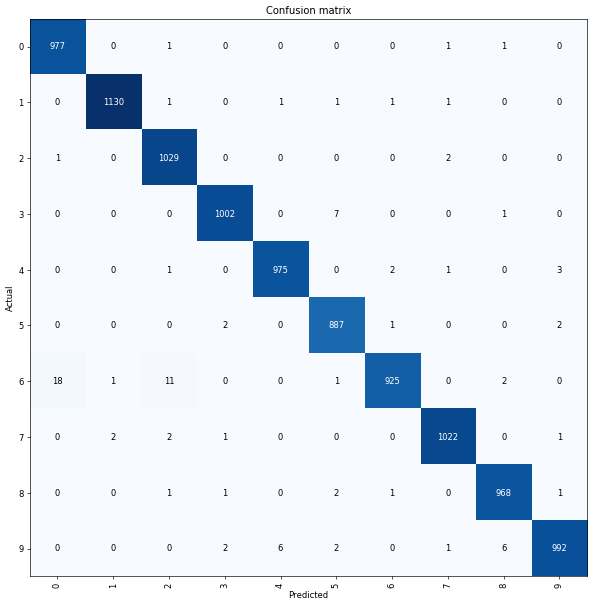

In [40]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

The confusion matrix is a tool to easily see performance of actual vs predicted. The model had an especially difficult time with predicting 2 for 6. The CNN was posting an 0.009300 error, but not seeing how those 6's would be mistaken for 2. My potential experiementation with max_lr could be to blame.

In [38]:
interp.most_confused(min_val=2)

[('6', '0', 18),
 ('6', '2', 11),
 ('3', '5', 7),
 ('9', '4', 6),
 ('9', '8', 6),
 ('4', '9', 3),
 ('2', '7', 2),
 ('4', '6', 2),
 ('5', '3', 2),
 ('5', '9', 2),
 ('6', '8', 2),
 ('7', '1', 2),
 ('7', '2', 2),
 ('8', '5', 2),
 ('9', '3', 2),
 ('9', '5', 2)]